EXAMPLE 5.9.5.
=====
Isotropic Bearings with Damping. The isotropic bearing Example 5.9.1 is repeated but with damping in the bearings. The, x and y directions are
uncoupled, with a translational stiffness of 1 MN/m and a damping of 3 kNs/m
in each direction.

In [16]:
from bokeh.io import output_notebook
import ross as rs
import numpy as np
output_notebook()

Loading BokehJS ...

(Figure(id='1913', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd769a6e3c8>)

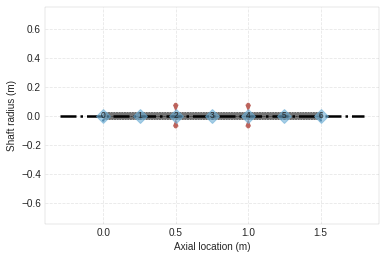

In [6]:
#Classic Instantiation of the rotor
shaft_elements = []
bearing_seal_elements = []
disk_elements = []
Steel = rs.steel
for i in range(6):
    shaft_elements.append(rs.ShaftElement(L=0.25, material=Steel, n=i, i_d=0, o_d=0.05))

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=4,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))
bearing_seal_elements.append(rs.BearingElement(n=6, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))

rotor595c = rs.Rotor(shaft_elements=shaft_elements,
                     bearing_seal_elements=bearing_seal_elements,
                     disk_elements=disk_elements,n_eigen = 12)

rotor595c.plot_rotor()

(Figure(id='2824', ...),
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7664ff4e0>)

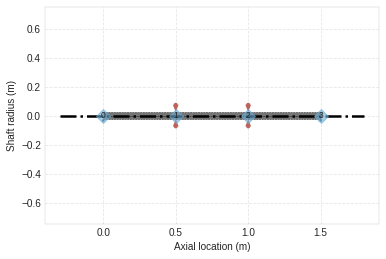

In [10]:
#From_section class method instantiation.
bearing_seal_elements = []
disk_elements = []
shaft_length_data = 3*[0.5]
i_d = 3*[0]
o_d = 3*[0.05]

disk_elements.append(rs.DiskElement.from_geometry(n=1,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.28
                                                 )
                    )

disk_elements.append(rs.DiskElement.from_geometry(n=2,
                                                  material=Steel, 
                                                  width=0.07,
                                                  i_d=0.05, 
                                                  o_d=0.35
                                                 )
                    )
bearing_seal_elements.append(rs.BearingElement(n=0, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))
bearing_seal_elements.append(rs.BearingElement(n=3, kxx=1e6, kyy=1e6, cxx=3e3, cyy=3e3))

rotor595fs = rs.Rotor.from_section(brg_seal_data=bearing_seal_elements,
                                   disk_data=disk_elements,leng_data=shaft_length_data,
                                   i_ds_data=i_d,o_ds_data=o_d
                                  )
rotor595fs.plot_rotor()


In [11]:
#Obtaining results for w=0 

print('Normal Instantiation =', rotor595c.wn/(2*np.pi),'[RPM]')
print('\n')
print('From Section Instantiation =', rotor595fs.wn/(2*np.pi),'[RPM]')

Normal Instantiation = [ 13.90536812  13.90536812  48.17762373  48.17762373 137.06057752
 137.06057752] [RPM]


From Section Instantiation = [ 13.90555699  13.90555699  48.19287648  48.19287648 136.24363053
 136.24363053] [RPM]


In [13]:
#Obtaining results for w=4000RPM 

rotor595c.w=4000*np.pi/30

print('Normal Instantiation =', rotor595c.wn/(2*np.pi))

Normal Instantiation = [ 13.69730748  14.09185971  43.60796387  52.17870498 122.36522778
 149.80603898]


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd7660b95f8>)

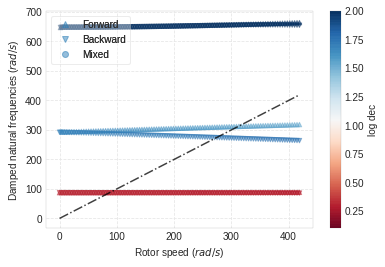

In [18]:
rotor595c.campbell(np.linspace(0,4000*np.pi/30,100)).plot()